<a href="https://colab.research.google.com/github/Ecatos/Data-Analysis-Portfolio-Emilio-Riccioli/blob/main/EDA%20sviluppatori%20con%20Python%20e%20Looker%20Studio.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **EDA sondaggio sviluppatori con Python e Looker Studio**

##### *Simulazione di un processo di analisi dati, dalla raccolta e pulizia fino alla visualizzazione e presentazione dei risultati*










#### DASHBOARD (Google Looker Studio): [LINK](https://lookerstudio.google.com/reporting/65baaaf2-bf77-49ed-93c4-e81f81efacb1)

#### PRESENTAZIONE (PowerPoint): [LINK](https://1drv.ms/p/c/8d569ea09f6afd97/ESvLxgYdsWlKnupSnzRxhWABr61sLxQ_iZ6NzaSL5ei3DQ?e=MMLpGc)



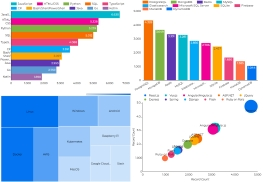
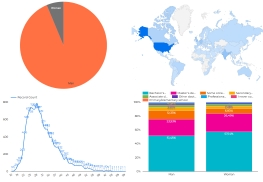
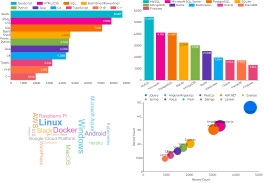

## **Obiettivi**

#### Analisi tecnologie emergenti per azienda IT

#### Uncovering di trend e insights
* skills-linguaggi</li>
* database tools</li>
* IDE più richiesti</li>
* dati demografici</li>


#### Presentazione risultati al cliente











##**Strumenti**

> Python

> Pandas

> Requests e Beautiful Soup

> Matplotlib e Seaborn

> Google Looker Studio




---
## **Dataset**
##[Stack Overflow Developer Survey 2024](https://stackoverflow.blog/2024/08/06/2024-developer-survey/)




*   Formato CSV (m1_survey_data.csv)

*   Sottoinsieme del dataset originale (65mila partecipanti), randomizzato e campione 1/10
















---

## **Metodologia**


#### **Web Scraping:** raccolta dati online

<ul type= "circle">
    <li>offerte lavoro </li>
    <li>blog/portali formazione</li>
    <li>sondaggi</li>
</ul>

#### **Data Wrangling:** pulizia e preparazione dati

#### **Data Exploration** con metodi statistici

#### **Grafici e visuals** ####

#### **Creazione Dashboard interattiva** ####




---

###**1.**    Data Gathering (Web Scraping Html)

Simuliamo un'estrazione di dati dal seguente sito:

https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html

Ci interessano il nome del linguaggio di programmazione ed il salario medio annuale

In [ ]:
# Importiamo librerie
from bs4 import BeautifulSoup   # modulo per il webscraping e l'analisi di documenti HTML, dalla libreria BeautifulSoup4
import requests                 # modulo per le richieste HTTP ai server web, ci serve per download pagine web
import pandas as pd             # libreria analisi dati
import matplotlib.pyplot as plt # grafici, pyplot è un sottomodulo di matplotlib
import seaborn as sns

Facciamo il download della pagina web e memorizziamo in una variabile

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBM-DA0321EN-SkillsNetwork/labs/datasets/Programming_Languages.html"

# Facciamo il download della pagina web e memorizziamo in variabile

data_0 = requests.get(url) # usiamo il metodo GET per inviare una richiesta HTTP al server

print(type(data_0)) # GET restituisce un oggetto "risposta" che contiene le info ricevute dal server, incluso il codice HTML della pagina WEB
print(data_0)       # risposta = [200] indica SUCCESSO da parte del server a cui abbiamo fatto richiesta del contenuto

data = data_0.text  #.TEXT è uno dei vari attributi dell'oggetto risposta, contiene il contenuto della webpage in formato STRINGA, cioè il codice HTML
print(type(data))

<class 'requests.models.Response'>
<Response [200]>
<class 'str'>


Creiamo un oggetto SOUP, che trasforma il codice HTML in una struttura gerarchica ideale per la navigazione e la ricerca dei tag html

In [ ]:
soup = BeautifulSoup(data,"html.parser") # passiamo alla classe BeautifulSoup la var data contenente il codice HTML da analizzare
                                         # il secondo argomento è il parser scelto per l'analisi, che è quello integrato di Python

print(type(soup)) # oggetto di classe BeautifulSoup

<class 'bs4.BeautifulSoup'>


Troviamo la tabella e l'assegniamo ad una variabile

In [ ]:
tabella = soup.find('table') # in html le tabella hanno tag table

print(type(tabella))

<class 'bs4.element.Tag'>


Estraiamo i dati dalla tabella, utilizzeremo:

* un ciclo For

* find_all() --> metodo dell'oggetto BeautifulSoup che restituisce lista di tutti i tag corrispondenti

* getText() --> metodo dell'oggetto Tag di BeautifulSoup che restituisce il testo contenuto all'interno del tag e dei suoi figli (in formato stringa)

In [ ]:
lista_linguaggi_salari = [] # vedi punto successivo

for riga in tabella.find_all('tr')[1:]: # in html le righe hanno tag tr
                                     # table.find_all crea una LISTA di tutti i tag tr
                                     # iteriamo la lista ed a turno ciascuna riga viene assegnato alla variabile ROW, riga1 1° ciclo, riga2 2° ciclo e così via
                                     # offset 1: per partire dalla seconda riga, la prima è intestazione

    # Per ciascuna riga del ciclo prendiamo tutte le colonne (creazione LISTA)
    lista_colonne = riga.find_all('td') # in html le colonne hanno tag td
    language = lista_colonne[1].getText()        # accediamo al secondo elemento lista colonne e salviamo il suo testo (.getText()) in variabile
    avg_salary = lista_colonne[3].getText()      # accediamo al quarto elemento lista colonne e salviamo il suo testo (.getText()) in variabile
    print("{}--->{}".format(language,avg_salary)) # stampiamo valore testo di 2° e 4° colonna, poi ripetiamo il ciclo
                                                  # .format() è un metodo stringa che sostituisce le variabili ai segnaposto {}

    lista_linguaggi_salari.append([language, avg_salary]) # vedi punto successivo

Python--->$114,383
Java--->$101,013
R--->$92,037
Javascript--->$110,981
Swift--->$130,801
C++--->$113,865
C#--->$88,726
PHP--->$84,727
SQL--->$84,793
Go--->$94,082


Salviamo i dati ottenuti in un file CSV, per questo abbiamo popolato la lista vuota nel punto precedente con metodo lista .append()

Per farlo creiamo prima un DataFrame Pandas con la lista di liste creata



In [ ]:
# creazione oggetto DataFrame con funzione pd.DataFrame() e assegnazione a variabile df_1
# ogni elemento della lista è una riga
# il secondo argomento sono i nomi delle colonne della nuova tabella (intestazione)
df_1 = pd.DataFrame(lista_linguaggi_salari, columns=['Linguaggio','Salario Medio Annuale'])
print(df_1)

   Linguaggio Salario Medio Annuale
0      Python              $114,383
1        Java              $101,013
2           R               $92,037
3  Javascript              $110,981
4       Swift              $130,801
5         C++              $113,865
6          C#               $88,726
7         PHP               $84,727
8         SQL               $84,793
9          Go               $94,082


Scriviamo il contenuto del DataFrame nel file CSV con il metodo .to_csv() di Pandas

In [ ]:
df_1.to_csv('linguaggi-popolari.csv', index=False)  # index = False non scrive l'indice come prima colonna

---

###**2.**    Data Exploration

Iniziamo scaricando il dataset in formato CSV con la funzione .read_csv() e salvandolo in un DataFrame Pandas

In [ ]:
url = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

# Scarichiamo (leggiamo) il file CSV e lo carichiamo in DataFrame pandas
df_2 = pd.read_csv(url)

# Salviamo il DataFrame come file CSV in Colab
df_2.to_csv("m1_survey_data.csv", index=False)

Visualizziamo le prime 3 righe con funzione .head() per verificare il download sia andato a buon fine

In [ ]:
df_2.head(3)

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN


Interroghiamo il numero di colonne e di righe con metodo .shape - otteniamo una TUPLA (righe, colonne)

In [ ]:
df_2.shape

(65437, 114)

Interroghiamo i DataType delle colonne

In [ ]:
with pd.option_context('display.max_rows', None): # gestore di contesto fornito da Pandas, modifica le opzioni di visualizzazione all'interno
                                                  # del codice indendato al blocco "with", eliminando la limitazione Colab per la visualizzaione
                                                  # di tutte le righe di output
  print(df_2.dtypes)

ResponseId                          int64
MainBranch                         object
Age                                object
Employment                         object
RemoteWork                         object
Check                              object
CodingActivities                   object
EdLevel                            object
LearnCode                          object
LearnCodeOnline                    object
TechDoc                            object
YearsCode                          object
YearsCodePro                       object
DevType                            object
OrgSize                            object
PurchaseInfluence                  object
BuyNewTool                         object
BuildvsBuy                         object
TechEndorse                        object
Country                            object
Currency                           object
CompTotal                         float64
LanguageHaveWorkedWith             object
LanguageWantToWorkWith            

Facciamo un resoconto veloce del Dataset con il metodo df.info() --> numero colonne, tipi di dati, utilizzo memoria

In [ ]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65437 entries, 0 to 65436
Columns: 114 entries, ResponseId to JobSat
dtypes: float64(13), int64(1), object(100)
memory usage: 56.9+ MB


Stampiamo il conteggio di tutti i valori nulli di ciascuna colonna

In [ ]:
print("\nValori mancanti per colonna:")
print(df_2.isnull().sum())


Valori mancanti per colonna:
ResponseId                 0
MainBranch                 0
Age                        0
Employment                 0
RemoteWork             10631
                       ...  
JobSatPoints_11        35992
SurveyLength            9255
SurveyEase              9199
ConvertedCompYearly    42002
JobSat                 36311
Length: 114, dtype: int64


E delle statistiche descrittive di base per le colonne numeriche con df.describe()

In [ ]:
df_2.describe()

,ResponseId,CompTotal,WorkExp,JobSatPoints_1,JobSatPoints_4,JobSatPoints_5,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,ConvertedCompYearly,JobSat
count,65437.000000,3.374000e+04,29658.000000,29324.000000,29393.000000,29411.000000,29450.000000,29448.00000,29456.000000,29456.000000,29450.000000,29445.000000,2.343500e+04,29126.000000
mean,32719.000000,2.963841e+145,11.466957,18.581094,7.522140,10.060857,24.343232,22.96522,20.278165,16.169432,10.955713,9.953948,8.615529e+04,6.935041
std,18890.179119,5.444117e+147,9.168709,25.966221,18.422661,21.833836,27.089360,27.01774,26.108110,24.845032,22.906263,21.775652,1.867570e+05,2.088259
min,1.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,16360.000000,6.000000e+04,4.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,3.271200e+04,6.000000
50%,32719.000000,1.100000e+05,9.000000,10.000000,0.000000,0.000000,20.000000,15.00000,10.000000,5.000000,0.000000,0.000000,6.500000e+04,7.000000
75%,49078.000000,2.500000e+05,16.000000,22.000000,5.000000,10.000000,30.000000,30.00000,25.000000,20.000000,10.000000,10.000000,1.079715e+05,8.000000
max,65437.000000,1.000000e+150,50.000000,100.000000,100.000000,100.000000,100.000000,100.00000,100.000000,100.000000,100.000000,100.000000,1.625660e+07,10.000000


Età media dei partecipanti al sondaggio?

Problematica: il sondaggio ha registrato le risposte sull'età con macrocategorie (stringhe)

Iniziamo elencando le categorie presenti con metodo .unique()




In [ ]:
df_2['Age'].unique()

array(['Under 18 years old', '35-44 years old', '45-54 years old',
       '18-24 years old', '25-34 years old', '55-64 years old',
       'Prefer not to say', '65 years or older'], dtype=object)

Creiamo un dizionario che mappa ciascuna categoria di età alla sua rappresentazione numerica

In [ ]:
mapping_eta = {
    'Under 18 years old': 18,               # sono rari i lavoratori più giovani di 18 anni, soprattutto in ambito IT dove è richiesto molto studio accademico
    '18-24 years old':    (18 + 24) / 2,
    '25-34 years old':    (25 + 34) / 2,
    '35-44 years old':    (35 + 44) / 2,
    '45-54 years old':    (45 + 54) / 2,
    '55-64 years old':    (55 + 64) / 2,
    '65 years or older':  65                # 65 è un buon valore rappresentativo, considerata l'età media pensionabile attuale che difficilmente supera i 65 anni
}

Dopodiche utilizziamo la funzione MAP di Pandas, che trasforma i valori di una serie pandas in base a una regola specificata

Nel nostro caso l'argomento è il DICT le cui chiavi sono le corrispondenze da cercare nella serie, ed i valori i nuovi valori assegnati

&nbsp;

La funzione MAP trasforma in NaN le corrispondenze che non vengono trovate, nel nostro caso 'Prefer not to say', per noi è ottimale dato che i valori NaN vengono esclusi dal calcolo fatto con .mean()

In [ ]:
# viene creata una nuova colonna, lasciando la colonna 'Age' inalterata
df_2['eta_numerica'] = df_2['Age'].map(mapping_eta)

print(df_2[['Age', 'eta_numerica']].head())

print() # spazio vuoto

print("La media d'età dei partecipanti è di:", round((df_2['eta_numerica'].mean()),), "anni")

                  Age  eta_numerica
0  Under 18 years old          18.0
1     35-44 years old          39.5
2     45-54 years old          49.5
3     18-24 years old          21.0
4     18-24 years old          21.0

La media d'età dei partecipanti è di: 33 anni


Quante nazioni compaiono nel sondaggio?

In [ ]:
print(len(df_2['Country'].unique()))

186


---

###**3.**    Data Wrangling

Per simulare la gestione dei duplicati, utilizziamo una versione del dataset che ne contiene

Contiamo le righe duplicate con metodi Pandas .duplicated() e .sum()

In [ ]:
file_con_duplicati = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/VYPrOu0Vs3I0hKLLjiPGrA/survey-data-with-duplicate.csv"

df_3 = pd.read_csv(file_con_duplicati)

numero_duplicati = df_3.duplicated().sum()  # .duplicated() genera valore TRUE quando viene trovata una riga ripetuta rispetto ad una precedente
                                            # TRUE ha valore binario 1, .sum fa la somma degli 1

print("Il DataFrame contiene", numero_duplicati, "righe duplicate.")
df_3.shape

Il DataFrame contiene 20 righe duplicate.


(65457, 114)

Siamo già certi della presenza di 20 righe aventi gli stessi identici valori di altre su tutte le colonne, cosa impossibile

&nbsp;

Facciamo però un ulteriore passaggio: supponendo che ResponseId sia la PrimaryKey del dataset, e l'identificativo univoco di ciascun record, quest'ultimo non dovrebbe ammettere valori duplicati

Verifichiamo nello specifico la presenza di duplicati sulla colonna ResponseId, sappiamo già che saranno ALMENO 20, ma saranno di più?

In [ ]:
numero_duplicati_ResponseId = df_3['ResponseId'].duplicated().sum()
print(numero_duplicati_ResponseId)

20


Ok sono 20. Concludiamo che corrispondono alle 20 duplicate del punto precedente

&nbsp;

Ma, a scopo dimostrativo e immaginando di non avere questa informazione, andiamo a vederle nel dettaglio

Creiamo un DataFrame delle righe duplicate, con il parametro keep = false, che ci farà vedere anche la prima occorrenza originale della riga, in maniera da poterla confrontare con la sua duplicata

La logica di questo passaggio è simulare un dataset con duplicati di ResponseId che però riportavano diverse risposte alle domande del sondaggio. In questo scenario eliminando i duplicati di ResponseId avremmo avuto una perdita di informazioni utili

In [ ]:
duplicati_ResponseId = df_3[df_3['ResponseId'].duplicated(keep=False)]
# attenzione all'uso delle [], per poter vedere l'output in maniera
# tabulare dobbiamo mandare a schermo sull'oggetto DataFrame e non su una Serie
# non ho utilizzato print poichè in Colab non dava il formato tabulare corretto
duplicati_ResponseId

,ResponseId,MainBranch,Age,Employment,RemoteWork,Check,CodingActivities,EdLevel,LearnCode,LearnCodeOnline,...,JobSatPoints_6,JobSatPoints_7,JobSatPoints_8,JobSatPoints_9,JobSatPoints_10,JobSatPoints_11,SurveyLength,SurveyEase,ConvertedCompYearly,JobSat
0,1,I am a developer by profession,Under 18 years old,"Employed, full-time",Remote,Apples,Hobby,Primary/elementary school,Books / Physical media,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,I am a developer by profession,35-44 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Bachelor’s degree (B.A., B.S., B.Eng., etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN
2,3,I am a developer by profession,45-54 years old,"Employed, full-time",Remote,Apples,Hobby;Contribute to open-source projects;Other...,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",Books / Physical media;Colleague;On the job tr...,Technical documentation;Blogs;Books;Written Tu...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
3,4,I am learning to code,18-24 years old,"Student, full-time",NaN,Apples,NaN,Some college/university study without earning ...,"Other online resources (e.g., videos, blogs, f...",Stack Overflow;How-to videos;Interactive tutorial,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN
4,5,I am a developer by profession,18-24 years old,"Student, full-time",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too short,Easy,NaN,NaN
5,6,I code primarily as a hobby,Under 18 years old,"Student, full-time",NaN,Apples,NaN,Primary/elementary school,"School (i.e., University, College, etc);Online...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Easy,NaN,NaN
6,7,"I am not primarily a developer, but I write co...",35-44 years old,"Employed, full-time",Remote,Apples,I don’t code outside of work,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)","Other online resources (e.g., videos, blogs, f...",Technical documentation;Stack Overflow;Written...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Neither easy nor difficult,NaN,NaN
7,8,I am learning to code,18-24 years old,"Student, full-time;Not employed, but looking f...",NaN,Apples,NaN,"Secondary school (e.g. American high school, G...","Other online resources (e.g., videos, blogs, f...",Technical documentation;Video-based Online Cou...,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Difficult,NaN,NaN
8,9,I code primarily as a hobby,45-54 years old,"Employed, full-time",In-person,Apples,Hobby,"Professional degree (JD, MD, Ph.D, Ed.D, etc.)",Books / Physical media;Other online resources ...,Stack Overflow;Written-based Online Courses,...,NaN,NaN,NaN,NaN,NaN,NaN,Appropriate in length,Neither easy nor difficult,NaN,NaN
9,10,I am a developer by profession,35-44 years old,"Independent contractor, freelancer, or self-em...",Remote,Apples,Bootstrapping a business,"Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",On the job training;Other online resources (e....,Technical documentation;Blogs;Written Tutorial...,...,NaN,NaN,NaN,NaN,NaN,NaN,Too long,Easy,NaN,NaN


In [ ]:
# Ok abbiamo verificato che le righe 65447 e 18521 oltre ad avere lo stesso ResponseId di 18522
# hanno anche le stesse informazioni su tutte le colonne. Confermando che possiamo eliminare senza problemi
# queste 20 righe duplicate senza perdita di informazioni utili

"65447	18522	I am a developer by profession	35-44 years old	Employed, full-time	Remote	Apples	Hobby;Freelance/contract work	Bachelor’s degree (B.A., B.S., B.Eng., etc.)	Colleague;Other online resources (e.g., videos...	Technical documentation;Written Tutorials;Stac..."
"18521	18522	I am a developer by profession	35-44 years old	Employed, full-time	Remote	Apples	Hobby;Freelance/contract work	Bachelor’s degree (B.A., B.S., B.Eng., etc.)	Colleague;Other online resources (e.g., videos...	Technical documentation;Written Tutorials;Stac..."

'18521\t18522\tI am a developer by profession\t35-44 years old\tEmployed, full-time\tRemote\tApples\tHobby;Freelance/contract work\tBachelor’s degree (B.A., B.S., B.Eng., etc.)\tColleague;Other online resources (e.g., videos...\tTechnical documentation;Written Tutorials;Stac...'

Aggiungiamo un livello di profondità.

Definiamo un sottoinsieme di informazioni (colonne) che possa aiutarci ad identificare altre risposte ai sondaggi duplicate, più difficili da individuare poichè possibilmente differiscono per i valori di alcune colonne e non di altre

Scegliamo queste:
* Age
* Employment
* EdLevel
* OrgSize
* Country
* CompTotal

In [ ]:
# definiamo il sottoinsieme di colonne (lista)
subset_colonne = ['Age', 'Employment', 'EdLevel', 'OrgSize', 'Country', 'CompTotal']

# identifichiamo le righe duplicate basandoci sul sottoinsieme di colonne
numero_duplicate_subset = df_3.duplicated(subset=subset_colonne).sum()
print(numero_duplicate_subset)

22978


Riscontriamo un numero enorme: 22978

Analizziamo l'output per capirne l'origine

In [ ]:
righe_duplicate_subset = df_3[df_3.duplicated(subset=subset_colonne)]
righe_duplicate_subset[subset_colonne]

,Age,Employment,EdLevel,OrgSize,Country,CompTotal
12,35-44 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,United States of America,NaN
49,25-34 years old,"Employed, full-time",Some college/university study without earning ...,NaN,Germany,NaN
53,25-34 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Bulgaria,NaN
71,45-54 years old,"Employed, full-time","Bachelor’s degree (B.A., B.S., B.Eng., etc.)",NaN,Sweden,NaN
74,55-64 years old,"Employed, full-time","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)",NaN,Switzerland,NaN
...,...,...,...,...,...,...
65452,18-24 years old,"Student, full-time;Employed, part-time",Some college/university study without earning ...,100 to 499 employees,Germany,NaN
65453,18-24 years old,"Employed, full-time;Employed, part-time",Some college/university study without earning ...,2 to 9 employees,Morocco,36000.0
65454,35-44 years old,"Employed, full-time;Independent contractor, fr...","Master’s degree (M.A., M.S., M.Eng., MBA, etc.)","1,000 to 4,999 employees",Nigeria,1500000.0
65455,25-34 years old,"Employed, full-time",Some college/university study without earning ...,100 to 499 employees,Germany,NaN


Salta subito all'occhio la numerosissima presenza di valori NaN, probabile causa dei falsi duplicati

Tra poco gestiremo questi valori nulli

Bene, possiamo procedere ad eliminare le 20 righe duplicate trovate all'inizio, senza rischio di perdita di informazione rilevanti

Mentre evitiamo di eliminare i 22978 record duplicati trovati con il subset di colonne

In [ ]:
df_3.drop_duplicates(inplace=True) # il parametro "inplace = True" indica che modifichiamo il DF originale
df_3.shape

(65437, 114)

Siamo passati con successo da 65457 a 65437 righe (-20)

---

Passiamo alla gestione dei valori NaN

In [ ]:
valori_mancanti = df_3.isnull().sum() # la funzione isnull() restituisce una serie di valori Booleani 0-1 esattamente come .duplicated()
valori_mancanti.head(8)

,0
ResponseId,0
MainBranch,0
Age,0
Employment,0
RemoteWork,10631
Check,0
CodingActivities,10971
EdLevel,4653


Interveniamo su EdLevel, sostituendo ai nulli il valore più ricorrente (la moda)

Utilizziamo il metodo .fillna(), che agisce su una serie o un DF sostituendo i NaN con l'argomento indicato

In [ ]:
df_3['EdLevel'].fillna(df_3['EdLevel'].mode()[0], inplace=True) # [0] poichè il metodo .mode() potrebbe restituire più mode in presenza di valori con più frequenze massime, con l'indice indichiamo di restituire solo il primo
                                                                # inplace = True sempre per applicare la modifica al DF originale (no copia)
valori_mancanti = df_3.isnull().sum()

print(f"EdLevel ha ora {valori_mancanti['EdLevel']} valori mancanti") # la f sta per f-string, che consente di incorporare espressioni Python direttamente all'interno di una stringa

<ipython-input-11-004bd792c52d>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['EdLevel'].fillna(df_3['EdLevel'].mode()[0], inplace=True) # [0] poichè il metodo .mode() potrebbe restituire più mode in presenza di valori con più frequenze massime, con l'indice indichiamo di restituire solo il primo


EdLevel ha ora 0 valori mancanti


Gestiamo ora i NaN sulla colonna ConvertedCompYearly (42002)

In [ ]:
df_3['ConvertedCompYearly'].fillna(df_3['ConvertedCompYearly'].mean(), inplace=True) # tutto identico a prima, ma sostituiamo il valore medio con .mean()

valori_mancanti = df_3.isnull().sum()

print(f"ConvertedCompYearly ha ora {valori_mancanti['ConvertedCompYearly']} valori mancanti")

<ipython-input-12-90bd78bb36b6>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['ConvertedCompYearly'].fillna(df_3['ConvertedCompYearly'].mean(), inplace=True) # tutto identico a prima, ma sostituiamo il valore medio con .mean()


ConvertedCompYearly ha ora 0 valori mancanti


Analizziamo la colonna RemoteWork con il metodo .value_counts() che calcola la frequenza di ciascun valore univoco

In [ ]:
df_3['RemoteWork'].value_counts(dropna = False) # il parametro dropna = False include i valori NaN nel conteggio

,count
RemoteWork,
"Hybrid (some remote, some in-person)",23015
Remote,20831
In-person,10960
NaN,10631


Sostituiamo come prima i NaN con il valore più frequente (Hybrid) e vediamo il risultato

In [ ]:
df_3['RemoteWork'].fillna(df_3['RemoteWork'].mode()[0], inplace = True)
df_3['RemoteWork'].value_counts(dropna = False)

<ipython-input-14-8b962ac791eb>:1: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_3['RemoteWork'].fillna(df_3['RemoteWork'].mode()[0], inplace = True)


,count
RemoteWork,
"Hybrid (some remote, some in-person)",33646
Remote,20831
In-person,10960


Corretto, i NaN sono diventati valori Hybrid

---

Andiamo ora ad eseguire un'operazione di normalizzazione sulla colonna ConvertedCompYearly, quest'ultima contenente gli stipendi normalizzati ad una valuta unitaria

Notiamo che i valori oscillano da un massimo di 16 milioni ad un minimo di 1

In [ ]:
print(f"Il massimo di ConvertedCompYearly è {df_3['ConvertedCompYearly'].max()}")
print(f"Il minimo di ConvertedCompYearly è {df_3['ConvertedCompYearly'].min()}")

Il massimo di ConvertedCompYearly è 16256603.0
Il minimo di ConvertedCompYearly è 1.0


Comparare questi valori graficamente potrebbe risultare molto difficile, essendo su scale di grandezza molto diverse

Facciamo un esperimento, applicando la tecnica Min-Max Scaling e convertendo tutti i valori in un intervallo compreso tra 0 e 1

Formula:

X_normalized = (X - X_min) / (X_max - X_min)
- dove X = valore originale

In [ ]:
minimo = df_3['ConvertedCompYearly'].min()
massimo = df_3['ConvertedCompYearly'].max()

# normalizzazione Min-Max
df_3['ConvertedCompYearly_MinMax'] = (df_3['ConvertedCompYearly'] - minimo) / (massimo - minimo)

Mettiamo ora a confronto graficamente la colonna originale e la sua versione normalizzata, per visualizzare come è cambiata la distribuzione

Text(0, 0.5, 'Frequenza')

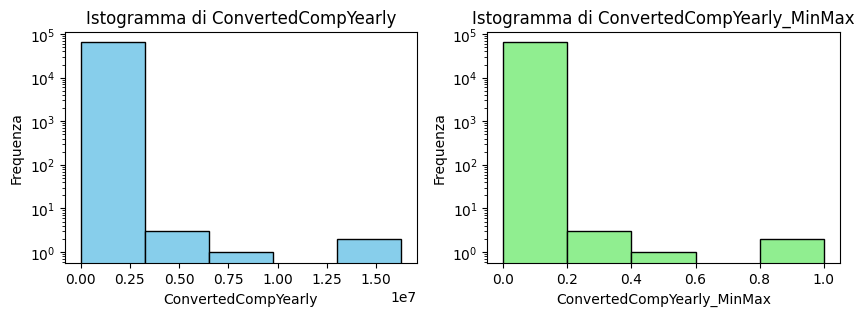

In [ ]:
# creiamo una nuova figura (una finestra di disegno) per i grafici
plt.figure(figsize=(10, 3))

# istogramma per 'ConvertedCompYearly'
plt.subplot(1, 2, 1)                                                              # sottografico: 1=num divisioni orizzontali, 2=num divisioni verticali, 1=primo sottografico)
plt.hist(df_3['ConvertedCompYearly'], bins=5, color='skyblue', edgecolor='black') # istogramma dei valori nella colonna ConvertedCompYearly
plt.title('Istogramma di ConvertedCompYearly')
plt.yscale('log')                                                                 # impostiamo asse Y su scala logaritmica
plt.xlabel('ConvertedCompYearly')
plt.ylabel('Frequenza')

# istogramma per 'ConvertedCompYearly_MinMax'
plt.subplot(1, 2, 2)                                                               # sottografico: 1=num divisione orizzontali, 2=num divisione verticali, 2=secondo sottografico)
plt.hist(df_3['ConvertedCompYearly_MinMax'], bins=5, color='lightgreen', edgecolor='black')
plt.title('Istogramma di ConvertedCompYearly_MinMax')
plt.yscale('log')
plt.xlabel('ConvertedCompYearly_MinMax')
plt.ylabel('Frequenza')

I due grafici appaiono praticamente identici nonostante la trasformazione.
Perchè?

1.  Il Min-Max Scaling è una trasformazione lineare. Ovvero preserva la distribuzione originale dei dati (la distribuzione dopo il Min-Max Scaling avrà la stessa forma) e cambierà solamente la scala dei valori sull'asse x

2.  Il Min-Max Scaling non altera la relazione tra i valori. Se un valore era maggiore di un altro prima della trasformazione, lo sarà anche dopo.
Questo è importante perché significa che la trasformazione non introduce distorsioni nei dati

Quindi l'utilità? Questa tecnica è per esempio molto utile nella preparazione dei dati per l'addestramento di un modello di ML

Eseguiamo un'ulteriore operazione di normalizzazione atta a preparare i dati per un'eventuale algoritmo di ML: la codifica ONE-HOT

Quest'ultima crea, a partire da una colonna di dati categorici (nel nostro esempio Employment), nuove colonne con valori numerici 0-1 per ciascuna categoria univoca presente nella colonna originale

In [ ]:
# codifica one-hot con la funzione dedicata Pandas .get_dummies()
df_3_one_hot = pd.get_dummies(df_3, columns=['Employment'])

# visualizziamo esclusivamente le nuove colonne codificate, sfruttiamo il fatto che ciascuna nuova colonna viene rinominata tramite .get_dummies() con "nome originale colonna""_""categoria"
df_3_one_hot.filter(like='Employment_').head() # il metodo filter() filtra le colonne che contengono la stringa 'Employment_' nel loro nome

,"Employment_Employed, full-time","Employment_Employed, full-time;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Employed, part-time;Retired","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Employed, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Not employed, and not looking for work;Student, part-time","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Retired","Employment_Employed, full-time;Independent contractor, freelancer, or self-employed;Student, part-time",...,"Employment_Student, full-time;Not employed, but looking for work;Not employed, and not looking for work;Student, part-time","Employment_Student, full-time;Not employed, but looking for work;Retired","Employment_Student, full-time;Not employed, but looking for work;Student, part-time","Employment_Student, full-time;Retired","Employment_Student, full-time;Student, part-time","Employment_Student, full-time;Student, part-time;Employed, part-time","Employment_Student, full-time;Student, part-time;Retired","Employment_Student, part-time","Employment_Student, part-time;Employed, part-time","Employment_Student, part-time;Retired"
0,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


---


Creiamo una nuova colonna chiamata "ExperienceLevel" che, prendendo i valori di YearsCodePro, indichi il livello di esperienza del candidato in base agli anni di esperienza in programmazione

Andiamo innanzitutto a vedere da che valori è composta YearsCodePro:

In [ ]:
print(df_3['YearsCodePro'].unique())

[nan '17' '27' '7' '11' '25' '12' '10' '3' 'Less than 1 year' '18' '37'
 '15' '20' '6' '2' '16' '8' '14' '4' '45' '1' '24' '29' '5' '30' '26' '9'
 '33' '13' '35' '23' '22' '31' '19' '21' '28' '34' '32' '40' '50' '39'
 '44' '42' '41' '36' '38' 'More than 50 years' '43' '47' '48' '46' '49']


Abbiamo sia valori NaN, che numerici, che stringhe

Definiamo una funzione che converta in float tutti i valori e che gestisca l'eccezione del NaN

In [ ]:
def conversione_years_code_pro(anni): # definiamo la funzione, con un singolo argomento placeholder (anni, ma è come intendere ciascuna riga della colonna che verrà iterata)
    if anni == 'Less than 1 year':
        return 0.5                    # assegniamo un valore numerico per "Less than 1 year"
    elif anni == 'More than 50 years':
        return 50                     # assegniamo un valore numerico per "More than 50 years"
# il blocco else gestisce qualsiasi altra casistica:
    else:
        try:                          # try, "provo" a fare l'operazione indicata, se ha successo ok
            return float(anni)
        except ValueError:            # se la conversione in float fallisce (incontrando errore ValueError)
            return None               # restituisco None

Perfetto, ora che abbiamo definito la funzione utilizziamo il metodo Pandas .apply()

.apply() applica una funzione lungo un asse di un DF o di una Series (iterando ed applicando in successione la funzione che prende come argomento su ciascuna riga o ciascuna colonna)

In [ ]:
# applichiamo la funzione a ciascun valore della colonna YearsCodePro ed assegniamo il risultato ad una nuova serie YearsCodePro_Numerico
df_3['YearsCodePro_Numerico'] = df_3['YearsCodePro'].apply(conversione_years_code_pro)

Chiudiamo utilizzando la funzione pd.cut() per creare ed aggiungere a df_3 la nuova colonna che suddivide i vari valori numerici in categorie

In [ ]:
# definiamo i limiti ed i nomi delle etichette
limiti = [0, 3, 10, float('inf')]
categorie = ['Beginner', 'Intermediate', 'Advanced']

# creiamo la colonna categorica con la funzione pd.cut() --> il primo argomento è la serie numerica, poi limiti, etichette,
# infine Right=False è l'indicazione del maggiore uguale: ad esempio 3 entra nell'intervallo 3-10 e non 0-3
df_3['ExperienceLevel'] = pd.cut(df_3['YearsCodePro_Numerico'], bins=bins, labels=labels, right=False)

# output
df_3['ExperienceLevel'].value_counts()

,count
ExperienceLevel,
Advanced,21719
Intermediate,20239
Beginner,9665


Abbiamo così concluso l'ultimo dei diversi esempi di tecniche per la normalizzazione dei dati, passiamo a creare alcuni grafici e visuals per trarre insight

---

###**4.**    Data Visualization

Ripartiamo da una nuova istanza pulita del dataset (checkpoint) e lo assegniamo a df

In [ ]:
file_originale = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv'

df = pd.read_csv(file_originale)

df.shape

(65437, 114)

Settiamo l'opzione globale su Colab di mostrare sempre tutte le colonne negli output

In [ ]:
pd.set_option('display.max_columns', None)

Correggiamo i NaN in queste 3 colonne critiche per l'analisi con il metodo già visto

In [ ]:
df['Employment'] = df['Employment'].fillna(df['Employment'].mode()[0])
df['JobSat'] = df['JobSat'].fillna(df['JobSat'].mode()[0])
df['RemoteWork'] = df['RemoteWork'].fillna(df['RemoteWork'].mode()[0])

conteggio_nan = df[['Employment','JobSat','RemoteWork']].isnull().sum()

for colonna in df[['Employment','JobSat','RemoteWork']]:
  print(df[colonna].value_counts())

Employment
Employed, full-time                                                                                                                                   39041
Independent contractor, freelancer, or self-employed                                                                                                   4846
Student, full-time                                                                                                                                     4709
Employed, full-time;Independent contractor, freelancer, or self-employed                                                                               3557
Not employed, but looking for work                                                                                                                     2341
                                                                                                                                                      ...  
Not employed, but looking for work;Independent contra

Verifichiamo l'assenza di NaN

In [ ]:
print(conteggio_nan)

Employment    0
JobSat        0
RemoteWork    0
dtype: int64


Iniziamo la nostra analisi visiva con un semplice grafico a colonne, con cui interroghiamo la distribuzione della soddisfazione lavorativa degli intervistati

testiamo anche se esiste qualche relazione con la dimensione "RemoteWork"



per evitare problemi di interpretabilità impostiamo l'asse Y su scala logaritmica

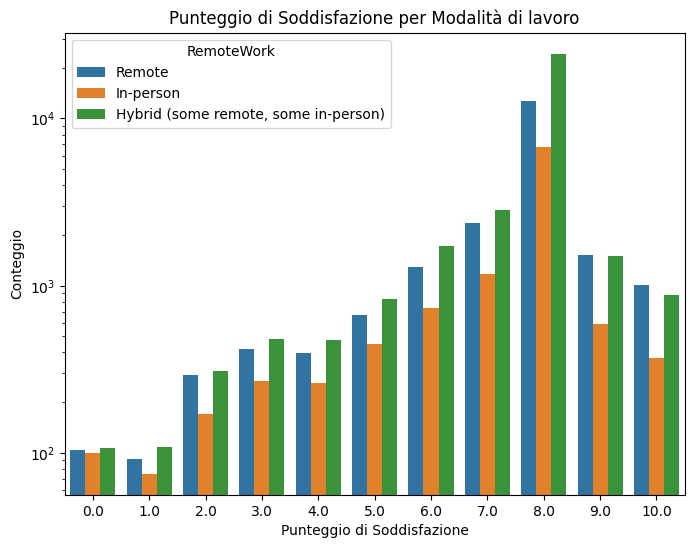

In [ ]:
plt.figure(figsize=(8, 6)) # tela + dimensioni
sns.countplot(x='JobSat', hue='RemoteWork', data=df)
# grafico seaborn per conteggi categorici di una variabile-->hue='RemoteWork' aggiunge una seconda variabile colorando e raggruppando le barre
plt.title('Punteggio di Soddisfazione per Modalità di lavoro')
plt.xlabel('Punteggio di Soddisfazione')
plt.ylabel('Conteggio')
plt.yscale('log')
plt.show()

La maggioranza degli intervistati si ritiene molto soddisfatta

inoltre il punteggio sembra essere direttamente proporzionale allo spread tra la modalità di lavoro ibride e remote rispetto a quelle in presenza, anche se è molto difficile da visualizzare in questo tipo di grafico

Approfondiamo quest'ultima tesi con un grafico a colonne impilate, ideale per visualizzare più chiaramente la composizione categorica

RemoteWork  Hybrid (some remote, some in-person)  In-person    Remote
JobSat                                                               
0.0                                     0.344051   0.321543  0.334405
1.0                                     0.394928   0.271739  0.333333
2.0                                     0.401554   0.220207  0.378238
3.0                                     0.412876   0.230901  0.356223
4.0                                     0.417699   0.230973  0.351327
5.0                                     0.427403   0.230061  0.342536
6.0                                     0.460144   0.194881  0.344975
7.0                                     0.446622   0.183728  0.369650
8.0                                     0.556207   0.154678  0.289115
9.0                                     0.416161   0.161886  0.421953
10.0                                    0.388272   0.163039  0.448689


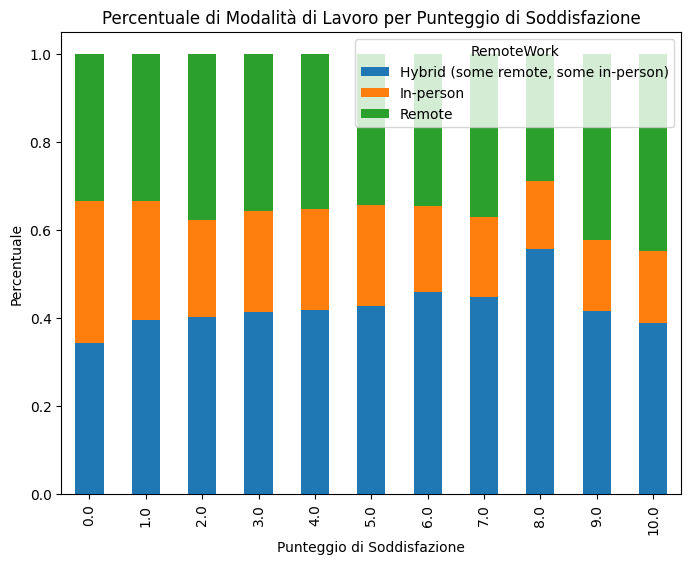

In [ ]:
# usiamo la funzione .groupby() per raggruppare i 10 valori di JobSat, poi per ciascuno dei 10 valori faccio il conteggio delle 3 occorrenze di "RemoteWork"
# normalize=True, paramentro di value_counts: invece di contare il numero assoluto, calcola la frequenza relativa di ciascun valore o ,in altre parole, le percentuali
# .unstack() è una funzione necessaria poichè grouped.plot si aspetta un DF le cui colonne rappresentano le diverse categorie da impilare;
# quest'ultima riorganizza quindi la series creando un DF con le modalità di lavoro come colonne
raggruppamento = df.groupby('JobSat')['RemoteWork'].value_counts(normalize=True).unstack()

print(raggruppamento)

raggruppamento.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Percentuale di Modalità di Lavoro per Punteggio di Soddisfazione')
plt.xlabel('Punteggio di Soddisfazione')
plt.ylabel('Percentuale')
plt.show()

Tesi confermata: modalità di lavoro ibrida e soddisfazione sono direttamente proporzionali

E qual è il percorso educativo più indicato per una carriera Tech?

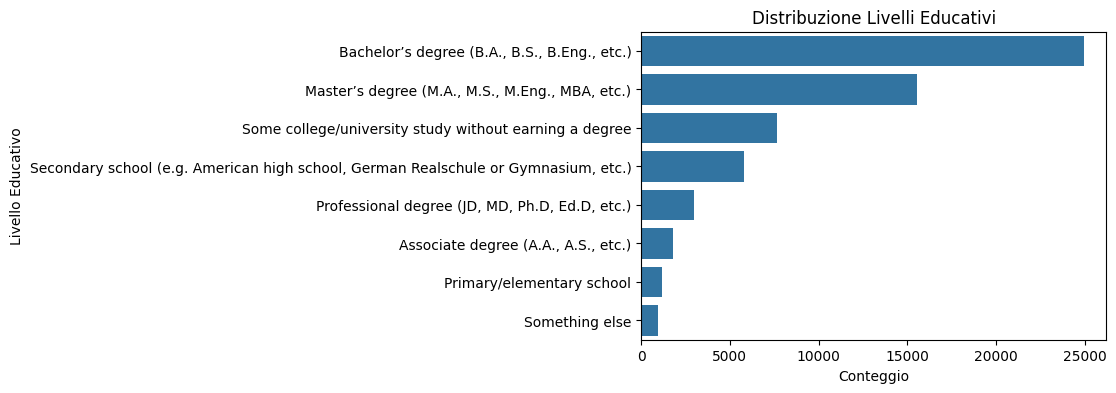

In [ ]:
plt.figure(figsize=(6, 4))  # tela + dimensioni
sns.countplot(y='EdLevel', data=df, order=df['EdLevel'].value_counts().index)
plt.title('Distribuzione Livelli Educativi')
plt.xlabel('Conteggio')
plt.ylabel('Livello Educativo')
plt.show()

Come intuibile una grossa percentuale di lavoratori tech ha conseguito almeno un percorso di laurea triennale o addirittura magistrale, indice di una carriera altamente specializzata e che richiede vasta conoscenza teorica e formazione

il campione di lavoratori privi di formazione accademica è comunque rilevante (10-20%)

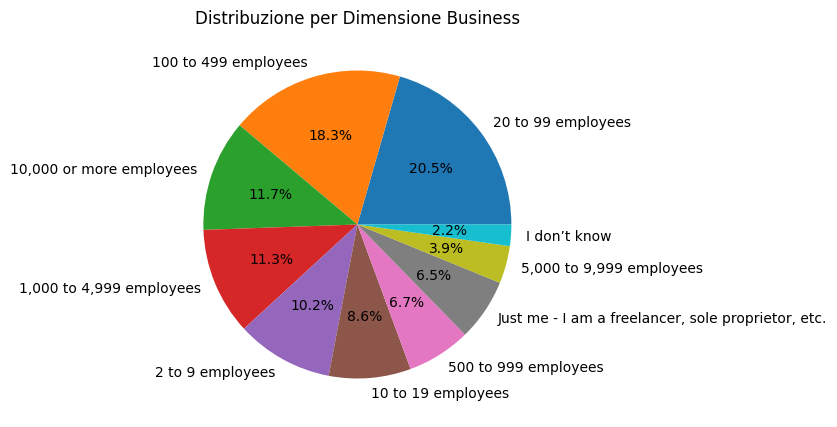

In [ ]:
plt.figure(figsize=(5, 5))  # tela + dimensioni
df['OrgSize'].value_counts().plot(kind='pie', autopct='%1.1f%%') # metodo .plot pandas + argomento specifico dei grafici a torta per formattazione labels %
plt.title('Distribuzione per Dimensione Business')
plt.ylabel('')  # per nascondere titolo asse y (count)
plt.show()

La distribuzione dei ruoli tech tra le varie forme di società sembra molto equilibrata, con nessuna categoria che prevale in maniera evidente sulle altre

Ne concludiamo che i lavoratori tech sono figure molto versatili, oltre che indispensabili in qualsiasi tipologia o dimensione di business

Visualizziamo con una mappa di calore la distribuzione degli stipendi tra le varie modalità di lavoro e tra le varie nazioni

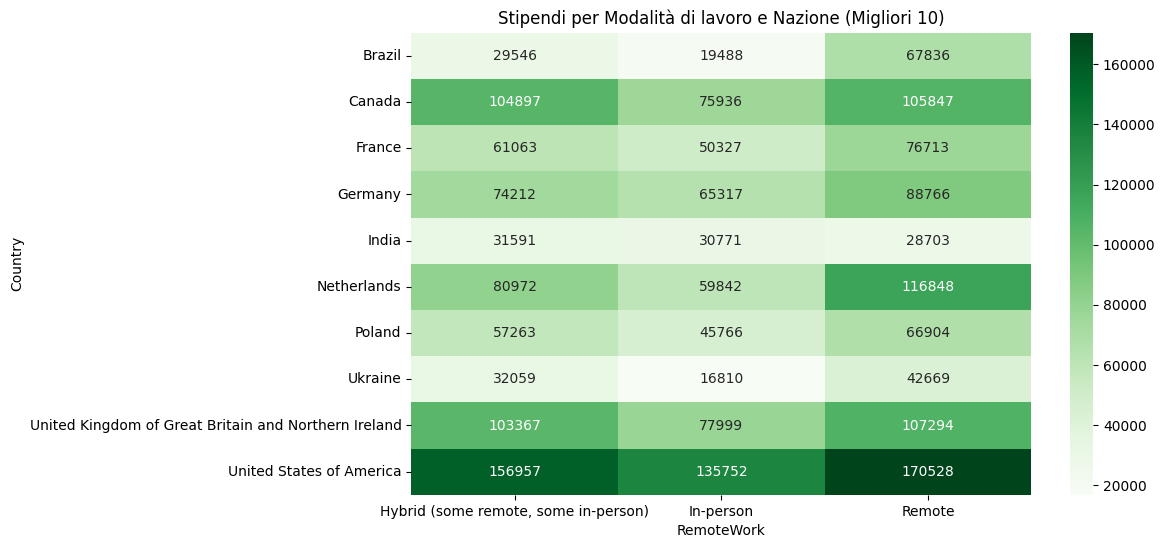

In [ ]:
# iniziamo filtrando solamente le 10 nazioni con più risposte al sondaggio:

# .isin() è una funzione filtro, in pratica creiamo un nuovo dataframe filtrato di nome df_top_10_countries
# .isin() restituisce TRUE oppure FALSE in base alla condizione specificata all'interno della sua parantesi
# nel nostro caso stiamo indicando: "TRUE solamente sulle righe della colonna Country in cui il valore di Country è uno dei paesi più frequenti" (.value_counts().head(10))
# value_counts restituisce una series Pandas in cui valori sono i conteggi ed i cui indici sono i nomi dei paesi
# .index seleziona gli indici (nomi dei paesi)
df_top_10_nazioni = df[df['Country'].isin(df['Country'].value_counts().head(10).index)]


plt.figure(figsize=(10, 6))
# assegniamo alla variabile dati_mappa_calore una tabella pivot con la funzione pd.pivot_table(), il primo argomento è il dataframe da cui prendere i dati, poi valori-righe-colonne e modalità di aggregazione
dati_mappa_calore = pd.pivot_table(df_top_10_nazioni, values='ConvertedCompYearly', index='Country', columns='RemoteWork', aggfunc='mean')

# creiamo la mappa di calore
# cmap="Greens"-->scala di colori verde
# annot=True-->valori numerici nelle celle
# fmt=".0f" formatta i valori numerici come interi senza decimali
sns.heatmap(dati_mappa_calore, cmap="Greens", annot=True, fmt=".0f")
plt.title('Stipendio medio per Modalità di lavoro e Nazione (Migliori 10)')
plt.show()


Stati Uniti, Canada, e Regno Unito sono le nazioni con la retribuzione media più alta.

Notiamo anche che gli assunti da remoto e ibridi ricevono compensi più alti rispetto a chi lavora esclusivamente in presenza.
Possiamo intuire che ad una modalità di lavoro ibrida generalmente corrisponde un ruolo IT più incentrato sullo sviluppo software/cloud rispetto ad uno di assistenza/hardware (quindi meglio pagato).

Inoltre le figure più novizie potrebbero essere più spesso vincolate a lavorare in presenza, dovendo ricevere formazione costante dai propri tutor e non avendo ancora molta autonomia e fiducia all'interno dell'organizzazione